# Tarea 3 de Aprendizaje de Maquinas
## Nicolás Alarcón 201473522-7
## Gabriel Valenzuela 201473505-7

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

## Pregunta 1 

### 1.a)

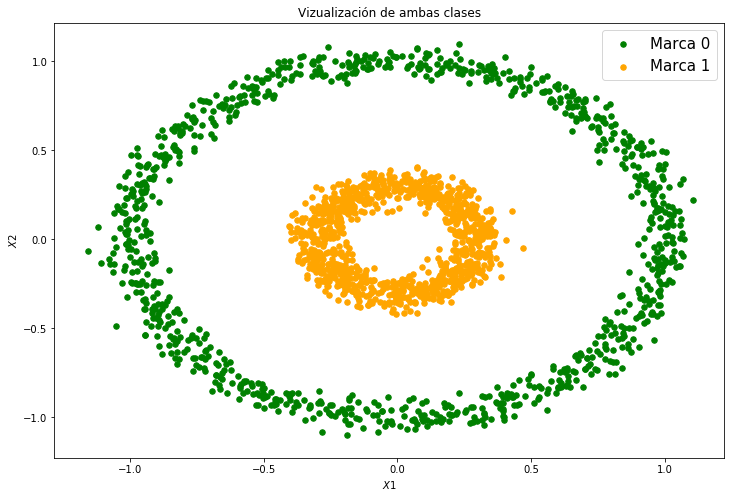

In [2]:
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
def do_circles(n=2000,noisy_n=0.05):
    generator = check_random_state(10)
    linspace = np.linspace(0, 2 * np.pi, n // 2 + 1)[:-1]
    outer_circ_x = np.cos(linspace)
    outer_circ_y = np.sin(linspace)
    inner_circ_x = outer_circ_x * .3
    inner_circ_y = outer_circ_y * .3
    X = np.vstack((np.append(outer_circ_x, inner_circ_x), np.append(outer_circ_y, inner_circ_y))).T
    y = np.hstack([np.zeros(n // 2, dtype=np.intp), np.ones(n // 2, dtype=np.intp)])
    X += generator.normal(scale=noisy_n, size=X.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
    return X_train,y_train,X_test,y_test

def plot_classifier(clf,X_train,Y_train,X_test,Y_test,model_type):
    f, axis = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(12, 8))
    axis.scatter(X_train[:,0],X_train[:,1],s=30,c=Y_train,zorder=10,cmap='cool')
    axis.scatter(X_test[:,0],X_test[:,1],s=20,c=Y_test,zorder=10,cmap='Greys')
    XX, YY = np.mgrid[-2:2:200j, -2:2:200j]
    if model_type == 'tree':
        Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:,0]
    elif model_type == 'ann':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else: raise ValueError('model type not supported')
    Z = Z.reshape(XX.shape)
    Zplot = Z >= 0.5
    axis.pcolormesh(XX, YY, Zplot ,cmap='YlGn')
    axis.contour(XX, YY, Z, alpha=1, colors=["k", "k", "k"], linestyles=["--", "-", "--"],levels=[-2, 0, 2])
    plt.show()
    
#=======grafico de los datos==============
X_train,Y_train,X_test,Y_test=do_circles()
plt.figure(figsize = (12, 8))
plt.scatter([X_train[i,0] for i in range(len(Y_train)) if Y_train[i] == 0],[X_train[i,1] for i in range(len(Y_train)) if Y_train[i] == 0], s=30, c = "green")
plt.scatter([X_train[i,0] for i in range(len(Y_train)) if Y_train[i] == 1],[X_train[i,1] for i in range(len(Y_train)) if Y_train[i] == 1], s=30, c = "orange")
plt.scatter([X_test[i,0] for i in range(len(Y_test)) if Y_test[i] == 0],[X_test[i,1] for i in range(len(Y_test)) if Y_test[i] == 0], s=30, c = "green")
plt.scatter([X_test[i,0] for i in range(len(Y_test)) if Y_test[i] == 1],[X_test[i,1] for i in range(len(Y_test)) if Y_test[i] == 1], s=30, c = "orange")
plt.xlabel("$X1$")
plt.ylabel("$X2$")
plt.legend(['Marca 0','Marca 1'],prop={'size': 15})
plt.title("Vizualización de ambas clases")
plt.show()


<p>Se logra apreciar las distribuciones de los distintos datos con sus repectivas etiquetas, dejando en claro que estamos frente a un problema que no es linealmente separable.</p>

### 1.b)

Using TensorFlow backend.


Epoch 1/50
1000/1000 [==============================] - 0s 178us/step - loss: 0.6947 - acc: 0.4690
Epoch 2/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.6944 - acc: 0.5030
Epoch 3/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.6936 - acc: 0.4950
Epoch 4/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.6945 - acc: 0.4850
Epoch 5/50
1000/1000 [==============================] - 0s 12us/step - loss: 0.6936 - acc: 0.4950
Epoch 6/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.6935 - acc: 0.4910
Epoch 7/50
1000/1000 [==============================] - 0s 12us/step - loss: 0.6931 - acc: 0.4990
Epoch 8/50
1000/1000 [==============================] - 0s 9us/step - loss: 0.6939 - acc: 0.5070
Epoch 9/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.6942 - acc: 0.4990
Epoch 10/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.6941 - acc: 0.5050
Epoch 11/50
1000/10

C:\Users\Gabriel\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


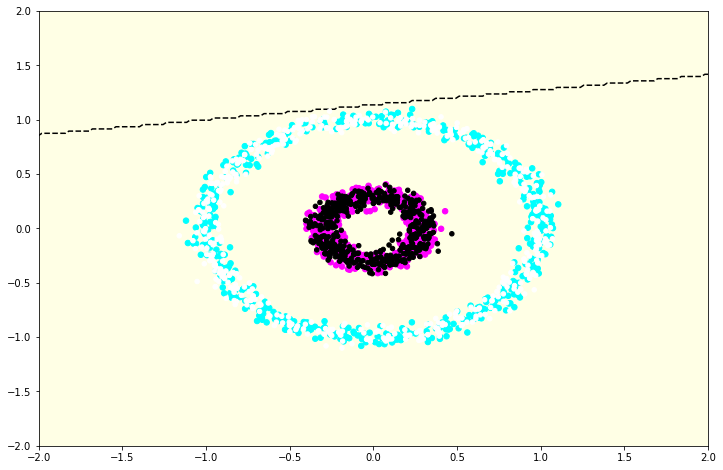

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(1,input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train,epochs=50, batch_size=100, verbose=1)
scores = model.evaluate(X_test, Y_test)
test_acc = scores[1]

plot_classifier(model,X_train,Y_train,X_test,Y_test,"ann")

Se logra apreciar que el problema en redes neuronales de una neurona se está tratando como uno linealmente separable, siendo que claramente no es así. Con este resultado, uno puede decir que el problema no tendrá solución, independiente de las modificaciones que se puedan hacer. Se logra apreciar además que los errores obtenidos son inexactos, ya que a pesar que de se obtienen valores cercanos al 50% de error, se ve que el problema no está bien ajustado a lo que de verdad se está intentando clasificar.

### 1.c)

Epoch 1/50
1000/1000 [==============================] - 0s 184us/step - loss: 0.6954 - acc: 0.4650
Epoch 2/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.6937 - acc: 0.4930
Epoch 3/50
1000/1000 [==============================] - 0s 9us/step - loss: 0.6932 - acc: 0.5050
Epoch 4/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.6940 - acc: 0.4890
Epoch 5/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.6906 - acc: 0.5330
Epoch 6/50
1000/1000 [==============================] - 0s 9us/step - loss: 0.6832 - acc: 0.6710
Epoch 7/50
1000/1000 [==============================] - 0s 9us/step - loss: 0.6665 - acc: 0.6940
Epoch 8/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.6271 - acc: 0.7910
Epoch 9/50
1000/1000 [==============================] - 0s 8us/step - loss: 0.5690 - acc: 0.8510
Epoch 10/50
1000/1000 [==============================] - 0s 9us/step - loss: 0.4973 - acc: 0.8700
Epoch 11/50
1000/1000 [

C:\Users\Gabriel\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


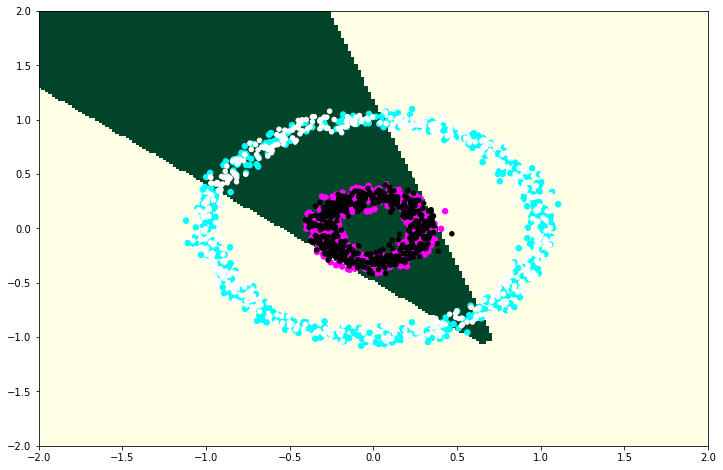

Epoch 1/50
1000/1000 [==============================] - 0s 202us/step - loss: 0.6936 - acc: 0.4850
Epoch 2/50
1000/1000 [==============================] - 0s 12us/step - loss: 0.6933 - acc: 0.5220
Epoch 3/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.6888 - acc: 0.5520
Epoch 4/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.6788 - acc: 0.6720
Epoch 5/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.6547 - acc: 0.7400
Epoch 6/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.6020 - acc: 0.8460
Epoch 7/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.5303 - acc: 0.8600
Epoch 8/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.4497 - acc: 0.9020
Epoch 9/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.3797 - acc: 0.9200
Epoch 10/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.3148 - acc: 0.9320
Epoch 11/50
1000/1

1000/1000 [==============================] - 0s 9us/step - loss: 0.0102 - acc: 1.0000
Epoch 33/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.0096 - acc: 1.0000
Epoch 34/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.0091 - acc: 1.0000
Epoch 35/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.0086 - acc: 1.0000
Epoch 36/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.0081 - acc: 1.0000
Epoch 37/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.0077 - acc: 1.0000
Epoch 38/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.0073 - acc: 1.0000
Epoch 39/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.0070 - acc: 1.0000
Epoch 40/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.0067 - acc: 1.0000
Epoch 41/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.0064 - acc: 1.0000
Epoch 42/50
1000/1000 [

1000/1000 [==============================] - 0s 10us/step - loss: 0.0810 - acc: 1.0000
Epoch 13/50
1000/1000 [==============================] - 0s 9us/step - loss: 0.0659 - acc: 1.0000
Epoch 14/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.0547 - acc: 1.0000
Epoch 15/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.0465 - acc: 1.0000
Epoch 16/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.0400 - acc: 1.0000
Epoch 17/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.0347 - acc: 1.0000
Epoch 18/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.0305 - acc: 1.0000
Epoch 19/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.0271 - acc: 1.0000
Epoch 20/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.0243 - acc: 1.0000
Epoch 21/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.0219 - acc: 1.0000
Epoch 22/50
1000/1000 [

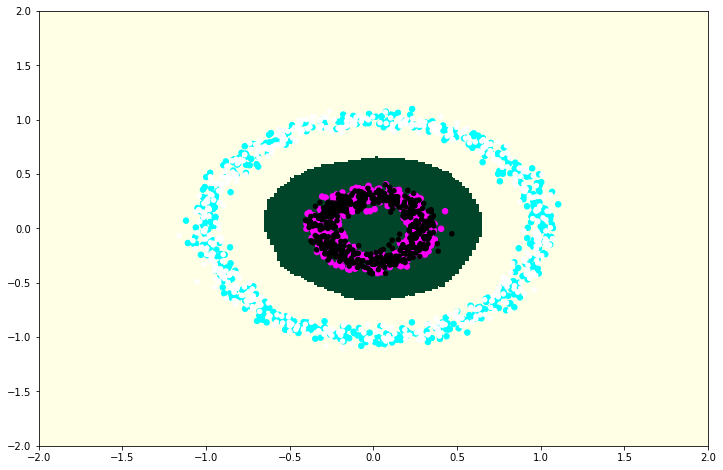

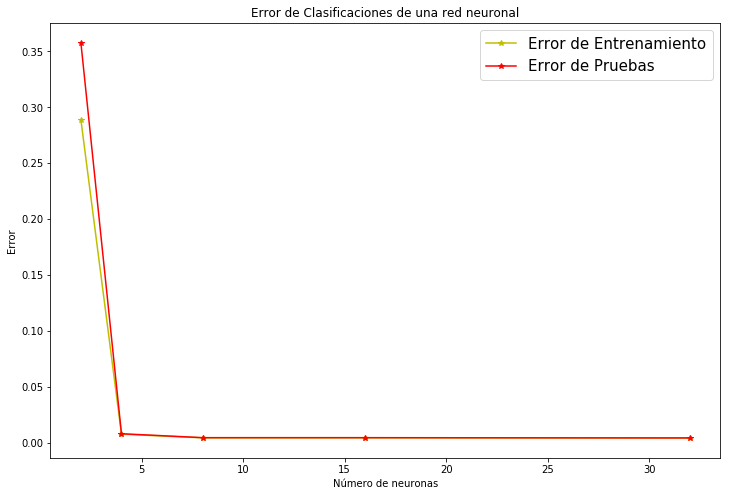

In [4]:
lista=[2**i for i in range(1,6)]
train_err=[]
test_err=[]
for n_h in lista:
    model = Sequential()
    model.add(Dense(n_h, input_dim=X_train.shape[1], kernel_initializer="uniform", activation="relu"))
    model.add(Dense(1, kernel_initializer="uniform", activation="sigmoid"))
    model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, Y_train,epochs=50, batch_size=100, verbose=1)
    tr_err = model.evaluate(X_train, Y_train) 
    t_err = model.evaluate(X_test, Y_test)
    train_err.append(tr_err[0])
    test_err.append(t_err[0])
    if n_h==2 or n_h==32:
        plot_classifier(model,X_train,Y_train,X_test,Y_test,"ann")
        

plt.figure(1, figsize = (12, 8))
plt.plot(lista,train_err, "*y-")
plt.plot(lista,test_err, "*r-")
plt.title('Error de Clasificaciones de una red neuronal')
plt.xlabel("Número de neuronas")
plt.ylabel("Error")
plt.legend(["Error de Entrenamiento", "Error de Pruebas"], prop={'size': 15})

plt.show()

Se logra observar como la red neuronal se acopla mejor al problema a medida que se aumenta el número de neuronas. Al observar las gráficas del problema, se aprecia como con 2 neuronas aún se está intentando separar linealmente el problema mientras que con 32, las clasificaciones toman las formas de los conjuntos de datos, separando correctamente estos últimos. Al ver el gráfico de errores, se observa como ambos disminuyen abruptamente al pasar de 2 a 4 neuronas, y como esto sigue en descenso a medida que se aumentan, hasta llegar al mínimo en 32.

### 1.d)

Test Accuracy = 0.670000
1


C:\Users\Gabriel\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


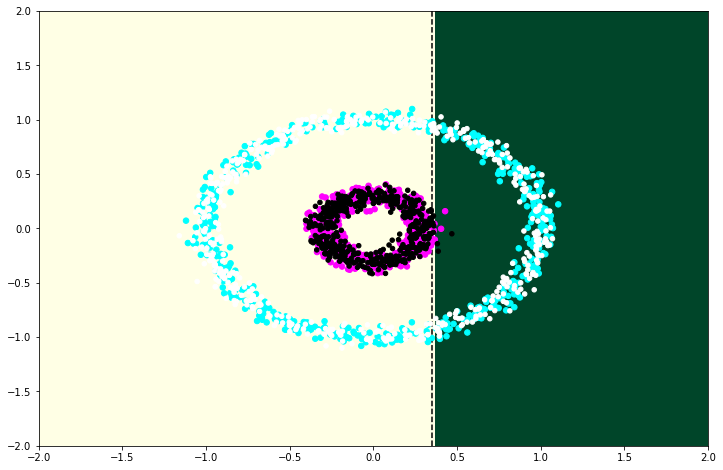

In [5]:
from sklearn.tree import DecisionTreeClassifier as Tree
clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=1)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print ("Test Accuracy = %f"%acc_test)
print (clf.tree_.max_depth)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

Se observa en la gráfica que el problema se intenta separar linealmente (al igual que la primera red neuronal ejecutada) siendo que los datos poseen otra distribución. Es por esto que se puede aplicar la misma explicación dada en las preguntas anteriores, donde no se puede clasificar correctamente y que el error asociado no es representativo. Por otro lado, no resulta necesario variar los paramentros, ya que siendo árboles de decisión de profundidad 1, siempre se tendrán dos conjuntos de datos separados por una recta, lo cual no podrá acoplarse al problema inherentemente

### 1.e)

C:\Users\Gabriel\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


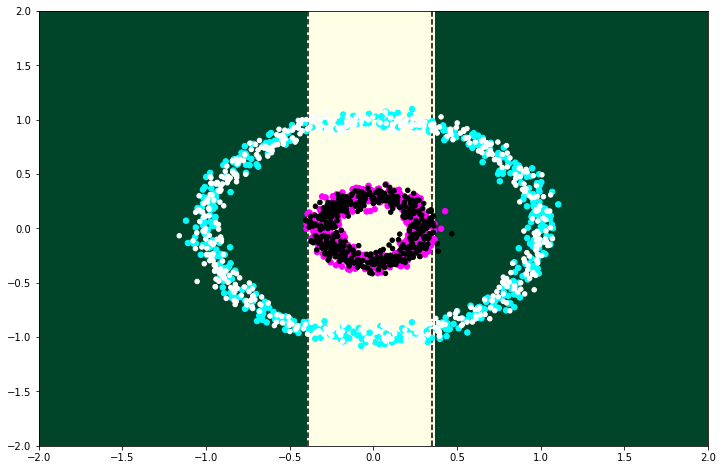

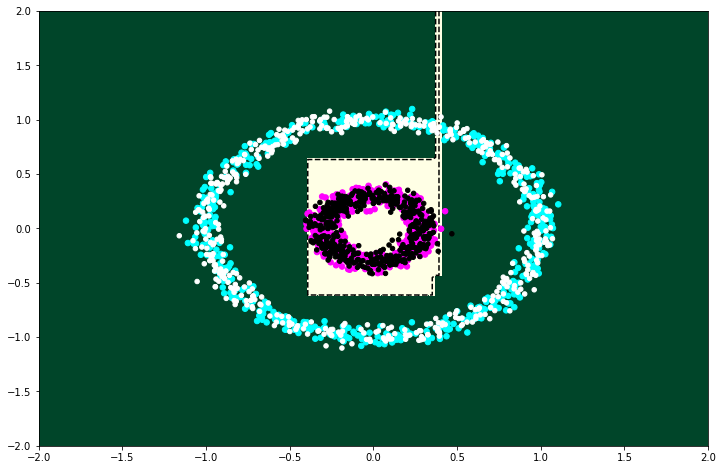

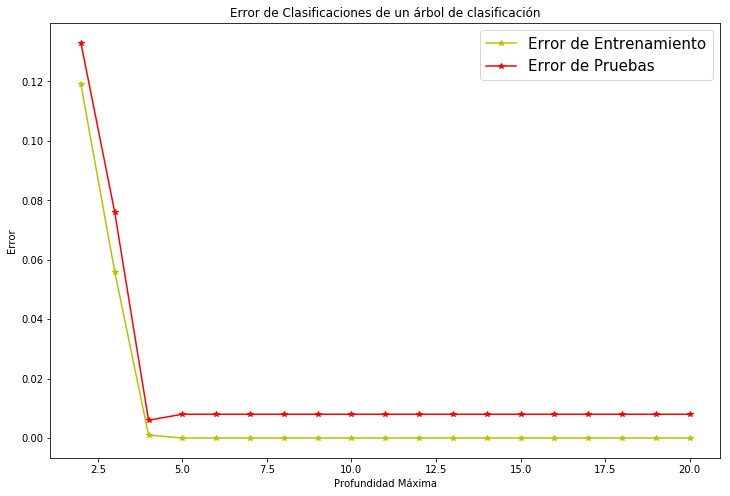

In [6]:
lista=range(2,21)
train_err=[]
test_err=[]
for n_t in lista:
    clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=n_t)
    clf.fit(X_train,Y_train)
    tr_err = 1-clf.score(X_train,Y_train)
    t_err = 1-clf.score(X_test,Y_test)
    train_err.append(tr_err)
    test_err.append(t_err)
    if n_t==2 or n_t==5:
        plot_classifier(clf,X_train,Y_train,X_test,Y_test,"tree")

plt.figure(1, figsize = (12, 8))
plt.plot(lista,train_err, "*y-")
plt.plot(lista,test_err, "*r-")
plt.title('Error de Clasificaciones de un árbol de clasificación')
plt.xlabel("Profundidad Máxima")
plt.ylabel("Error")
plt.legend(["Error de Entrenamiento", "Error de Pruebas"], prop={'size': 15})

plt.show()


Se logra apreciar como a medida que se aumenta la profundidad, se disminuye más el error tanto de entrenamiento como de pruebas. Se aprecia además en el primero gráfico de los datos como se comienzan a adaptar la forma de las clasificaciones a la disposición de los datos. Esto queda mejor demostrado en el último gráfico impreso, el cual no corresponde a la última representación del problema, ya que luego de cierto umbral se comienza a presentar overfitting.

### 1.f)

In [7]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2,kernel="rbf", gamma=5)
kpca = kpca.fit(X_train)
Xkpca_train = kpca.transform(X_train)
Xkpca_test = kpca.transform(X_test)

### 1.g)

Epoch 1/50
1000/1000 [==============================] - 0s 264us/step - loss: 0.6944 - acc: 0.5070
Epoch 2/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.6934 - acc: 0.5030
Epoch 3/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.6936 - acc: 0.5050
Epoch 4/50
1000/1000 [==============================] - 0s 12us/step - loss: 0.6935 - acc: 0.5090
Epoch 5/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.6936 - acc: 0.5070
Epoch 6/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.6958 - acc: 0.4850
Epoch 7/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.6932 - acc: 0.5010
Epoch 8/50
1000/1000 [==============================] - 0s 9us/step - loss: 0.6933 - acc: 0.5030
Epoch 9/50
1000/1000 [==============================] - 0s 10us/step - loss: 0.6932 - acc: 0.4890
Epoch 10/50
1000/1000 [==============================] - 0s 8us/step - loss: 0.6938 - acc: 0.5010
Epoch 11/50
1000/100

C:\Users\Gabriel\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


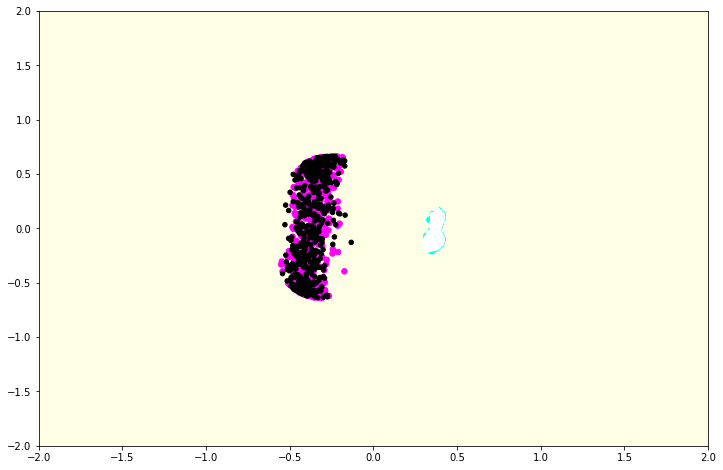

Red de una neurona:
Error de entrenamiento = 0.69319665575
Error de pruebas = 0.694069714069


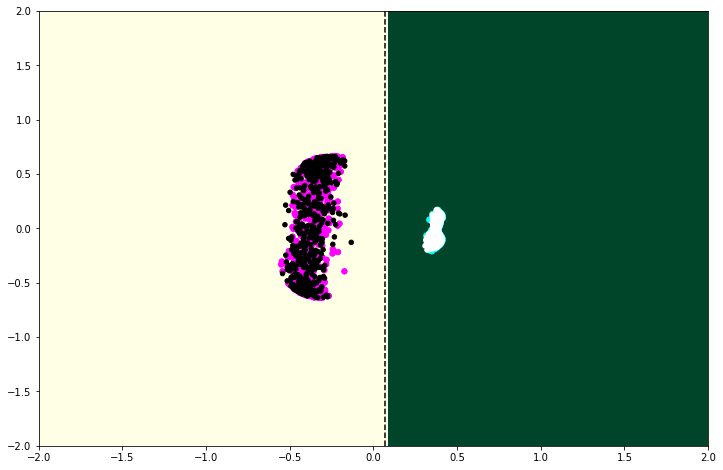

Árbol de profundidad 1:
Error de entrenamiento = 0.0
Error de pruebas = 0.0


In [8]:
model = Sequential()
model.add(Dense(1,input_dim=Xkpca_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(Xkpca_train, Y_train,epochs=50, batch_size=100, verbose=1)
tr_err = model.evaluate(Xkpca_train, Y_train) 
t_err = model.evaluate(Xkpca_test, Y_test)
plot_classifier(model,Xkpca_train,Y_train,Xkpca_test,Y_test,"ann")

print("Red de una neurona:")
print ("Error de entrenamiento =",tr_err[0])
print ("Error de pruebas =",t_err[0])

clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=1)
clf.fit(Xkpca_train,Y_train)
tr_err = 1 - clf.score(Xkpca_train, Y_train)
t_err = 1 - clf.score(Xkpca_test, Y_test) 
plot_classifier(clf,Xkpca_train,Y_train,Xkpca_test,Y_test,'tree')


print("Árbol de profundidad 1:")
print ("Error de entrenamiento =",tr_err)
print ("Error de pruebas =",t_err)


Ya que anteriormente se concluyó que una red neuronal de una neurona y los árboles con profunidad 1 tratan el problema como uno linealmente separable, se aprovechó para analizar su desempeño resolviendo el problema en 2 dimensiones. Con los resultados obtenidos, se observa que el árbol posee un mayor desempeño ya que resuelve el problema, diviendo el conjunto perfectamente. Sin embargo, estos resultados podrían no ser representativos del caso. 

## Pregunta 2

### 2.a)

In [9]:
import pandas as pd
import numpy as np
dftrain = pd.read_csv('bike_sharing_train.csv')
dfval = pd.read_csv('bike_sharing_val.csv')
dftest = pd.read_csv('bike_sharing_test.csv')
ntrain = len(dftrain)
nval = len(dftrain) + len(dfval)
df = pd.concat([dftrain,dfval,dftest])
print('\nSummary - dataframe completo:\n')
print( df.describe())
print(df.info())
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['hour'] = pd.to_numeric(df['hour'])

df.drop(['Unnamed: 0'], axis=1, inplace=True)

print("\n-------Despues del procesamiento------\n")
print(df.describe())
print(df.info())


Summary - dataframe completo:

         Unnamed: 0        season       holiday    workingday       weather  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean    5442.500000      2.506614      0.028569      0.680875      1.418427   
std     3142.661849      1.116174      0.166599      0.466159      0.633839   
min        0.000000      1.000000      0.000000      0.000000      1.000000   
25%     2721.250000      2.000000      0.000000      0.000000      1.000000   
50%     5442.500000      3.000000      0.000000      1.000000      1.000000   
75%     8163.750000      4.000000      0.000000      1.000000      2.000000   
max    10885.000000      4.000000      1.000000      1.000000      4.000000   

              temp         atemp      humidity     windspeed        casual  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     61.886460     12.799395     36.021955   
std        7.79159    

C:\Users\Gabriel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


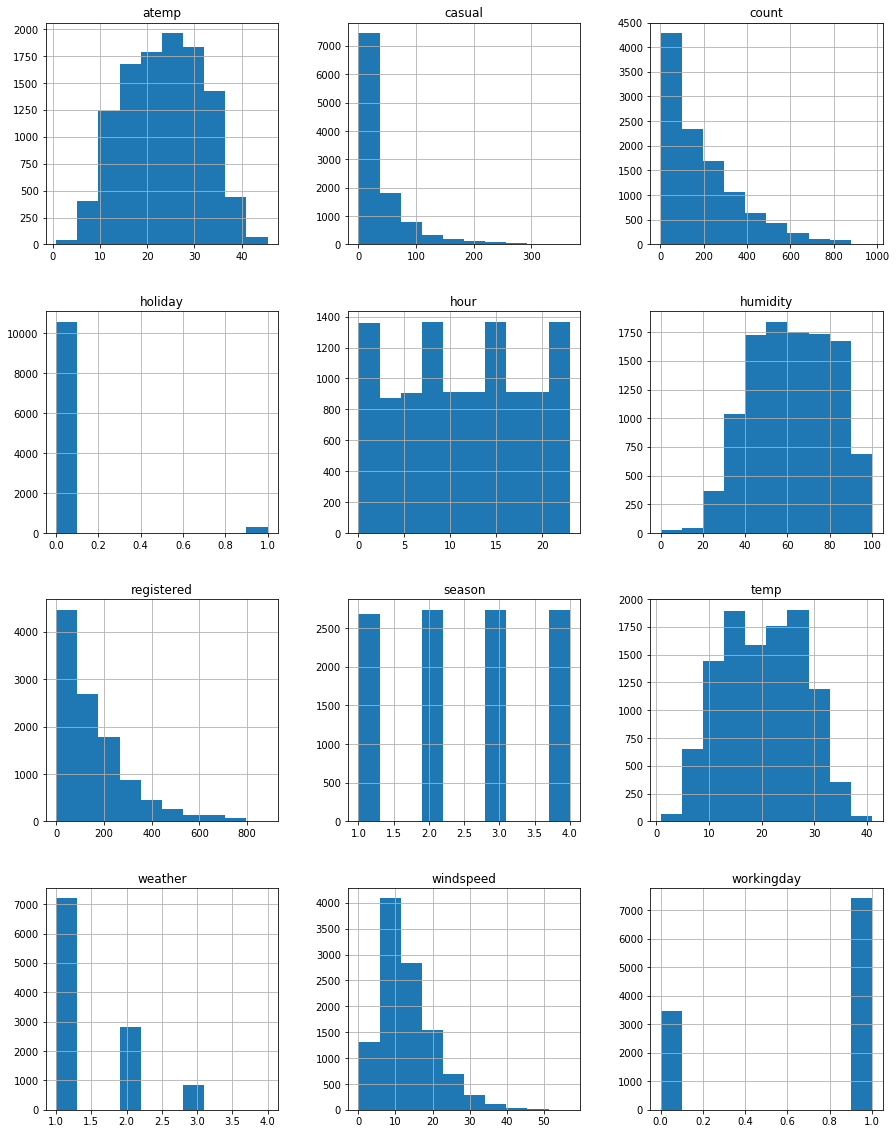

In [10]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

### 2.b)

SCORE TEST=0.703388
KAGG EVAL TRAIN =0.028516
KAGG EVAL TEST =0.574239


C:\Users\Gabriel\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


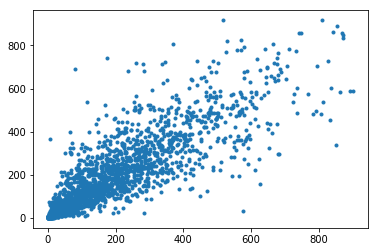

In [11]:
from sklearn.tree import DecisionTreeRegressor as Tree
import matplotlib.pyplot as plt
def eval_bikemodel(y_predict,y_true):
    diff = np.log(y_predict+1.0) - np.log(y_true+1.0)
    return np.sqrt(np.sum(np.square(diff))/len(y_predict))
Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp',
            'humidity','windspeed','hour']]
Ydf=df.ix[:,'count']
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

model = Tree(random_state=0)
model.fit(X_train,Y_train)
score_test = model.score(X_test,Y_test)
print ("SCORE TEST=%f"%score_test)

Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)
kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
kagg_test = eval_bikemodel(Y_pred_test,Y_test)

print ("KAGG EVAL TRAIN =%f"%kagg_train)
print ("KAGG EVAL TEST =%f"%kagg_test)
plt.plot(Y_test,Y_pred_test,'.')
plt.show()

### 2.c)

KAGG EVAL VAL =0.451162
KAGG EVAL TEST =0.493948


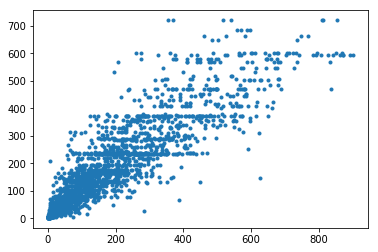

In [12]:
model = Tree(random_state=0,max_depth=10, criterion="mse", splitter = "best", min_samples_split=7, min_samples_leaf=9,
             min_weight_fraction_leaf = 0., max_features=1.0, max_leaf_nodes=None)
model.fit(X_train,Y_train)

Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)

kagg_val = eval_bikemodel(Y_pred_val,Y_val)
kagg_test = eval_bikemodel(Y_pred_test,Y_test)

print ("KAGG EVAL VAL =%f"%kagg_val)
print ("KAGG EVAL TEST =%f"%kagg_test)

plt.plot(Y_test,Y_pred_test,'.')
plt.show()

### 2.d)

In [13]:
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek#0:lunes,6:domingo
df['cday'] = pd.to_numeric(df['cday'])
Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp',
'humidity','windspeed','hour','cday']]

SCORE TEST=0.801517
KAGG EVAL TRAIN =0.396238
KAGG EVAL VAL =0.453942


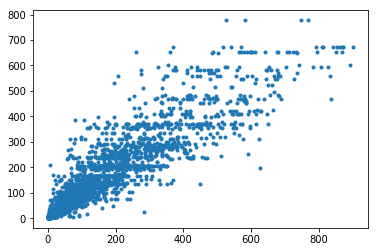

In [14]:
Ydf=df.ix[:,'count']
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
X_train = scalerX.fit_transform(X_train)
X_val = scalerX.transform(X_val)
X_test = scalerX.transform(X_test)


model = Tree(random_state=0,max_depth=10, criterion="mse", splitter = "best", min_samples_split=7, min_samples_leaf=9,
             min_weight_fraction_leaf = 0., max_features=1.0, max_leaf_nodes=None)
model.fit(X_train,Y_train)
score_test = model.score(X_test,Y_test)
print ("SCORE TEST=%f"%score_test)

Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)
kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
kagg_test = eval_bikemodel(Y_pred_test,Y_test)

print ("KAGG EVAL TRAIN =%f"%kagg_train)
print ("KAGG EVAL VAL =%f"%kagg_val)
#print ("KAGG EVAL TEST =%f"%kagg_test)
plt.plot(Y_test,Y_pred_test,'.')
plt.show()

### 2.e)

C:\Users\Gabriel\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


KAGG EVAL TRAIN =0.328857
KAGG EVAL VAL =0.399935
KAGG EVAL TEST =0.420375


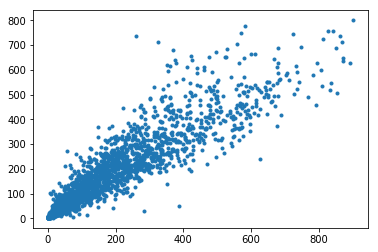

In [15]:
import pandas as pd
import numpy as np
dftrain = pd.read_csv('bike_sharing_train.csv')
dfval = pd.read_csv('bike_sharing_val.csv')
dftest = pd.read_csv('bike_sharing_test.csv')
ntrain = len(dftrain)
nval = len(dftrain) + len(dfval)

#load dataframes as before ...
df = pd.concat([dftrain,dfval,dftest])
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek
df['hour'] = pd.to_numeric(df['hour'])
df['cday'] = pd.to_numeric(df['cday'])
Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp',
'humidity','windspeed','hour','cday']]
#PASO IMPORTANTE MAS ABAJO ...
Xdf = pd.get_dummies(Xdf,columns=['season', 'weather','hour','cday'])
Ydf=df.ix[:,'count']

##
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values
##

from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
X_train = scalerX.fit_transform(X_train)
X_val = scalerX.transform(X_val)
X_test = scalerX.transform(X_test)

from sklearn.svm import SVR
model = SVR()

Y_train = np.log(Y_train)

model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_train = np.exp(Y_pred_train)

Y_pred_val = model.predict(X_val)
Y_pred_val = np.exp(Y_pred_val)

Y_pred_test = model.predict(X_test)
Y_pred_test = np.exp(Y_pred_test)

Y_train = np.exp(Y_train)

kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
kagg_test = eval_bikemodel(Y_pred_test,Y_test)

print ("KAGG EVAL TRAIN =%f"%kagg_train)
print ("KAGG EVAL VAL =%f"%kagg_val)
print ("KAGG EVAL TEST =%f"%kagg_test)
plt.plot(Y_test,Y_pred_test,'.')
plt.show()

### 2.f)

In [16]:
model = SVR(C=1,epsilon=0.01)

Y_train = np.log(Y_train)

model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_train = np.exp(Y_pred_train)

Y_pred_val = model.predict(X_val)
Y_pred_val = np.exp(Y_pred_val)

Y_pred_test = model.predict(X_test)
Y_pred_test = np.exp(Y_pred_test)

Y_train = np.exp(Y_train)

kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
print("KAGG EVAL TRAIN =%f"%kagg_train)
print("KAGG EVAL VAL =%f"%kagg_val)

KAGG EVAL TRAIN =0.332181
KAGG EVAL VAL =0.405945


### 2.g)

In [17]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

##
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values
##


Xm = X_train
ym = Y_train

kf = KFold(n_splits=10)
mse_cv = 0
for train, val in kf.split(Xm):
    model = DecisionTreeClassifier(random_state=0)
    model.fit(Xm[train], ym[train])
    yhat_val = model.predict(Xm[val])
    ytrue_val = ym[val]
    score_fold = eval_bikemodel(yhat_val,ytrue_val)
    mse_cv += score_fold
mse_cv = mse_cv / 10
print(mse_cv)

0.740751885664


In [18]:
from sklearn.model_selection import KFold

Xm = X_train
ym = Y_train


kf = KFold(n_splits=10)
mse_cv = 0
for train, val in kf.split(Xm):
    model = SVR()
    model.fit(Xm[train], ym[train])
    yhat_val = model.predict(Xm[val])
    ytrue_val = ym[val]
    score_fold = eval_bikemodel(yhat_val,ytrue_val)
    mse_cv += score_fold
mse_cv = mse_cv / 10
print(mse_cv)

1.40969634111


### 2.h)

In [19]:
Ydf=df.ix[:,'registered'] #demanda registrada
##
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values

Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values

##

from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(random_state=0)

model1.fit(X_train,Y_train)

Y_pred_val = model1.predict(X_val)


kagg_val = eval_bikemodel(Y_pred_val,Y_val)


print ("KAGG EVAL VAL =%f"%kagg_val)


KAGG EVAL VAL =0.581180


In [20]:
Ydf=df.ix[:,'casual'] #demanda casual##

Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values

from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier(random_state=0)

model2.fit(X_train,Y_train)

Y_pred_val = model2.predict(X_val)

kagg_val = eval_bikemodel(Y_pred_val,Y_val)

print ("KAGG EVAL VAL =%f"%kagg_val)

KAGG EVAL VAL =0.774065


In [21]:
Ydf=df.ix[:,'count'] #demanda total
Y_test = Ydf[nval:].values
X_test = Xdf[nval:].values

Y_pred_test1 = model1.predict(X_test)
Y_pred_test2 = model2.predict(X_test)

Y_pred_test = Y_pred_test1 + Y_pred_test2

kagg_test = eval_bikemodel(Y_pred_test,Y_test)
print ("KAGG EVAL TEST =%f"%kagg_test)

KAGG EVAL TEST =0.601008


### 2.i)

In [22]:
from sklearn.ensemble import RandomForestRegressor

Ydf=df.ix[:,'count']

##
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values
##



equis = []
iesVal = []
iesTest = []

for i in range(1,3):


    equis.append(i)
    modelRF = RandomForestRegressor(n_estimators=i,max_depth=None,random_state=0)

    modelRF.fit(X_train, Y_train)

#scores = cross_val_score(model, xTrain, train['good_quality'], cv=10)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

    yVal_pred = modelRF.predict(X_val)
    yTest_pred = modelRF.predict(X_test)

    kagg_val = eval_bikemodel(Y_pred_test,Y_val)
    kagg_test = eval_bikemodel(Y_pred_test,Y_test)
    
    iesVal.append(kagg_val)
    iesTest.append(kagg_test)
#print("F1-score train =%f"%fTrain)
#print("F1-score test =%f"%fTest)

plt.title('Train evaluacion')
plt.ylabel(' evaluacion')
plt.xlabel('numero de arboles')
plt.plot(equis, iesVal)
plt.show()

plt.title('Test F1-score')
plt.ylabel(' evaluacion')
plt.xlabel('numero de arboles')
plt.plot(equis, iesTest)
plt.show()

ValueError: operands could not be broadcast together with shapes (2147,) (2177,) 

## Pregunta 3

### 3.a)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  isRed  isWhite  
0      9.4        5      1        0  
1      9.8

C:\Users\Gabriel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


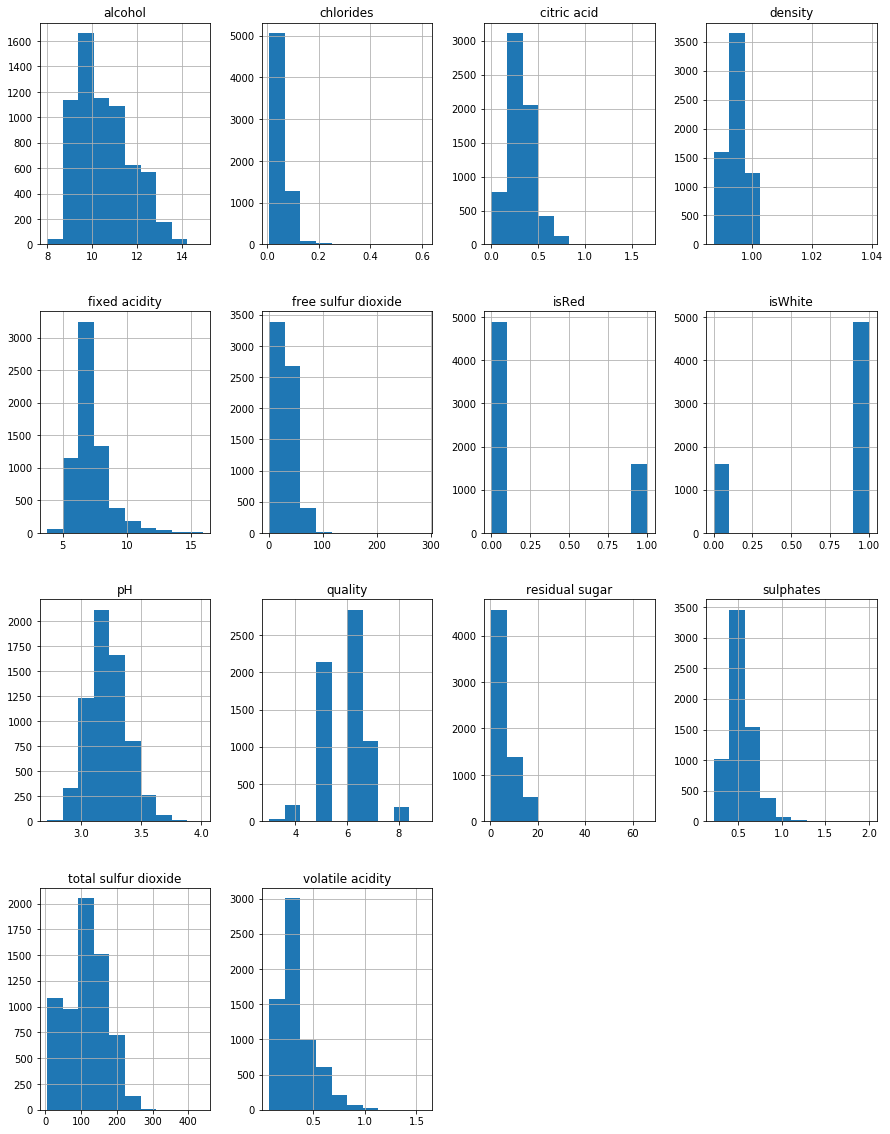

In [23]:
import pandas as pd
df_red = pd.read_csv("winequality-red.csv",sep=";")
df_red['isRed']=1
df_red['isWhite']=0
#print(df_red.head())

df_white = pd.read_csv("winequality-white.csv",sep=";")
df_white['isRed']=0
df_white['isWhite']=1

df = pd.concat([df_red,df_white], axis=0)
nred = len(df_red)
#genere atributo 'tipo'


print(df.head())
print(df.describe())
print(df.info())

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

### 3.b)

In [24]:
df['good_quality'] = [1 if q>5 else 0 for q in df.quality] #then remove 'quality' from df
frame = df.drop('quality', axis=1)
#train and test split over df


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

train, test = train_test_split(frame, test_size=0.25)

xTrain = train.drop('good_quality', axis=1)
xTest = test.drop('good_quality', axis=1)

### 3.c)

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(xTrain, train['good_quality'])

scores = cross_val_score(clf, xTrain, train['good_quality'], cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

yTrain_pred = clf.predict(xTrain)
yTest_pred = clf.predict(xTest)

fTrain = f1_score(train['good_quality'], yTrain_pred)
fTest = f1_score(test['good_quality'], yTest_pred)

print("F1-score train =%f"%fTrain)
print("F1-score test =%f"%fTest)

Accuracy: 0.77 (+/- 0.04)
F1-score train =1.000000
F1-score test =0.826679


### 3.d)

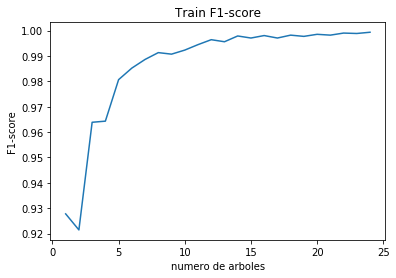

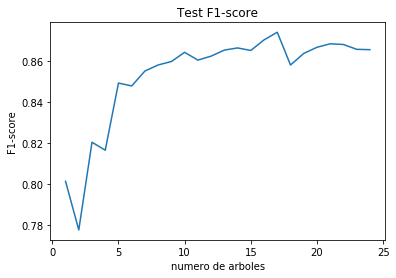

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

equis = []
iesTrain = []
iesTest = []

for i in range(1,25):


    equis.append(i)
    modelRF = RandomForestClassifier(n_estimators=i, max_depth=None,n_jobs=-1)

    modelRF.fit(xTrain, train['good_quality'])

#scores = cross_val_score(model, xTrain, train['good_quality'], cv=10)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

    yTrain_pred = modelRF.predict(xTrain)
    yTest_pred = modelRF.predict(xTest)

    fTrain = f1_score(train['good_quality'], yTrain_pred)
    fTest = f1_score(test['good_quality'], yTest_pred)

    iesTrain.append(fTrain)
    iesTest.append(fTest)
#print("F1-score train =%f"%fTrain)
#print("F1-score test =%f"%fTest)

plt.title('Train F1-score')
plt.ylabel('F1-score')
plt.xlabel('numero de arboles')
plt.plot(equis, iesTrain)
plt.show()

plt.title('Test F1-score')
plt.ylabel('F1-score')
plt.xlabel('numero de arboles')
plt.plot(equis, iesTest)
plt.show()

### 3.e)

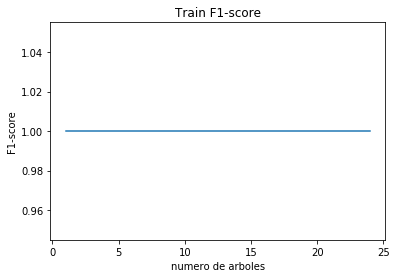

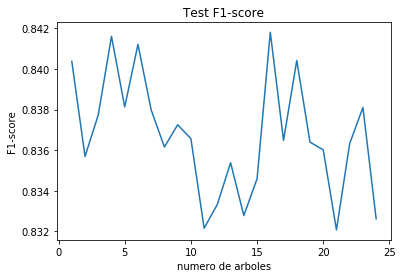

In [27]:
from sklearn.ensemble import AdaBoostClassifier

equis = []
iesTrain = []
iesTest = []


for i in range(1,25):
    equis.append(i)

    model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=None), n_estimators=i, algorithm='SAMME.R')

    model.fit(xTrain, train['good_quality'])

    scores = cross_val_score(model, xTrain, train['good_quality'], cv=10)
    #print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

    yTrain_pred = model.predict(xTrain)
    yTest_pred = model.predict(xTest)

    fTrain = f1_score(train['good_quality'], yTrain_pred)
    fTest = f1_score(test['good_quality'], yTest_pred)

    iesTrain.append(fTrain)
    iesTest.append(fTest)

#print("F1-score train =%f"%fTrain)
#print("F1-score test =%f"%fTest)

plt.title('Train F1-score')
plt.ylabel('F1-score')
plt.xlabel('numero de arboles')
plt.plot(equis, iesTrain)
plt.show()

plt.title('Test F1-score')
plt.ylabel('F1-score')
plt.xlabel('numero de arboles')
plt.plot(equis, iesTest)
plt.show()

### 3.f)

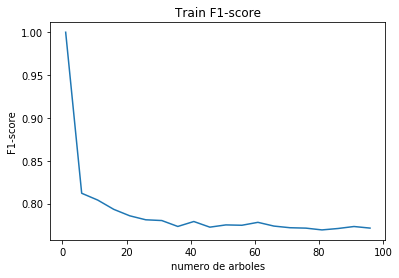

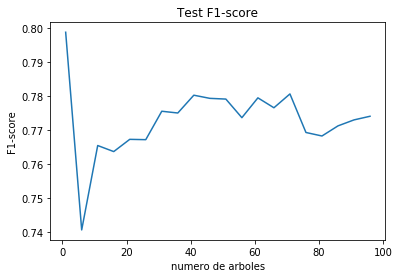

In [28]:
from sklearn.neighbors import KNeighborsClassifier

equis = []
iesTrain = []
iesTest = []


for i in range(1,100,5):
    equis.append(i)

    model = KNeighborsClassifier(n_neighbors=i)

    model.fit(xTrain, train['good_quality'])

    scores = cross_val_score(model, xTrain, train['good_quality'], cv=10)
    #print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

    yTrain_pred = model.predict(xTrain)
    yTest_pred = model.predict(xTest)

    fTrain = f1_score(train['good_quality'], yTrain_pred)
    fTest = f1_score(test['good_quality'], yTest_pred)

    iesTrain.append(fTrain)
    iesTest.append(fTest)

    #print("F1-score train =%f"%fTrain)
    #print("F1-score test =%f"%fTest)

plt.title('Train F1-score')
plt.ylabel('F1-score')
plt.xlabel('numero de arboles')
plt.plot(equis, iesTrain)
plt.show()

plt.title('Test F1-score')
plt.ylabel('F1-score')
plt.xlabel('numero de arboles')
plt.plot(equis, iesTest)
plt.show()

### 3.g)

Feature ranking:
1. feature 10 (0.154296)
2. feature 1 (0.111147)
3. feature 7 (0.101252)
4. feature 6 (0.088770)
5. feature 4 (0.085638)
6. feature 5 (0.084572)
7. feature 3 (0.078365)
8. feature 2 (0.074184)
9. feature 9 (0.074031)
10. feature 8 (0.070765)
11. feature 0 (0.069009)
12. feature 11 (0.005212)
13. feature 12 (0.002760)


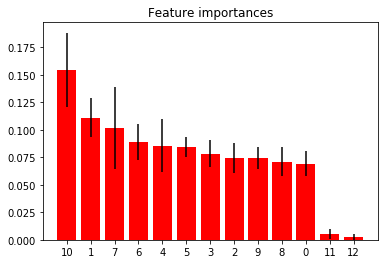

In [29]:
modelRF.get_params()

X = xTrain

importances = modelRF.feature_importances_
std = np.std([tree.feature_importances_ for tree in modelRF.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


## Pregunta 4

### 4.a)

In [30]:
from sklearn.model_selection import train_test_split
def load_data():
    train = pd.read_csv('sign_mnist_train.csv')
    test = pd.read_csv('sign_mnist_test.csv')
        
    y_tr = train['label']
    x_tr = train.iloc[:,1:]
    y_t = test['label']
    x_t = test.iloc[:,1:]
    
    x_tr,x_v,y_tr,y_v = train_test_split(x_tr, y_tr, test_size=7000, random_state=50)
    return(x_tr,x_v,x_t,y_tr,y_v,y_t)

x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()

### 4.b)

In [31]:
from sklearn.preprocessing import StandardScaler

def escalar(x_tr,x_v,x_t):
    x_tr=x_tr/255
    x_t=x_t/255
    x_v=x_v/255
    
    return (x_tr,x_v,x_t)

def estandarizar(x_tr,x_v,x_t):
    std = StandardScaler(with_mean=True)
    x_tr_scaled = pd.DataFrame(std.fit_transform(x_tr), columns=x_tr.columns)
    x_t_scaled = pd.DataFrame(std.transform(x_t), columns=x_t.columns)
    x_v_scaled = pd.DataFrame(std.transform(x_v), columns=x_v.columns)
    return (x_tr_scaled,x_v_scaled,x_t_scaled)

def graficar_loss(historia):
    datos=historia.history['val_loss']
    plt.figure(figsize = (16, 5))
    plt.xlabel('Epochs')
    plt.ylabel('Validation Loss')
    plt.plot([i for i in range(len(datos))],datos, 'g*-')
    plt.plot([0.2]*len(datos),'r')
    plt.legend("Error de validación")
    plt.show()

### 4.c)

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

model = Sequential()
model.add(Dense(30, input_dim=x_tr.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(30, kernel_initializer='uniform', activation='relu'))
model.add(Dense(25, kernel_initializer='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
historia = model.fit(x_tr.values, to_categorical(y_tr), epochs=100, batch_size=128, verbose=1,validation_data=(x_v.values,to_categorical(y_v)))

Train on 20455 samples, validate on 7000 samples
Epoch 1/100
20455/20455 [==============================] - 1s 58us/step - loss: 15.4400 - acc: 0.0375 - val_loss: 15.5632 - val_acc: 0.0344
Epoch 2/100
20455/20455 [==============================] - 1s 39us/step - loss: 15.5098 - acc: 0.0377 - val_loss: 15.5632 - val_acc: 0.0344
Epoch 3/100
20455/20455 [==============================] - 1s 39us/step - loss: 15.5098 - acc: 0.0377 - val_loss: 15.5632 - val_acc: 0.0344
Epoch 4/100
20455/20455 [==============================] - 1s 39us/step - loss: 15.5098 - acc: 0.0377 - val_loss: 15.5632 - val_acc: 0.0344
Epoch 5/100
20455/20455 [==============================] - 1s 40us/step - loss: 15.5098 - acc: 0.0377 - val_loss: 15.5632 - val_acc: 0.0344
Epoch 6/100
20455/20455 [==============================] - 1s 40us/step - loss: 15.5098 - acc: 0.0377 - val_loss: 15.5632 - val_acc: 0.0344
Epoch 7/100
20455/20455 [==============================] - 1s 38us/step - loss: 15.5098 - acc: 0.0377 - val_los

Epoch 59/100
20455/20455 [==============================] - 1s 36us/step - loss: 15.5098 - acc: 0.0377 - val_loss: 15.5632 - val_acc: 0.0344
Epoch 60/100
20455/20455 [==============================] - 1s 36us/step - loss: 15.5098 - acc: 0.0377 - val_loss: 15.5632 - val_acc: 0.0344
Epoch 61/100
20455/20455 [==============================] - 1s 37us/step - loss: 15.5098 - acc: 0.0377 - val_loss: 15.5632 - val_acc: 0.0344
Epoch 62/100
20455/20455 [==============================] - 1s 37us/step - loss: 15.5098 - acc: 0.0377 - val_loss: 15.5632 - val_acc: 0.0344
Epoch 63/100
20455/20455 [==============================] - 1s 37us/step - loss: 15.5098 - acc: 0.0377 - val_loss: 15.5632 - val_acc: 0.0344
Epoch 64/100
20455/20455 [==============================] - 1s 37us/step - loss: 15.5098 - acc: 0.0377 - val_loss: 15.5632 - val_acc: 0.0344
Epoch 65/100
20455/20455 [==============================] - 1s 38us/step - loss: 15.5098 - acc: 0.0377 - val_loss: 15.5632 - val_acc: 0.0344
Epoch 66/100


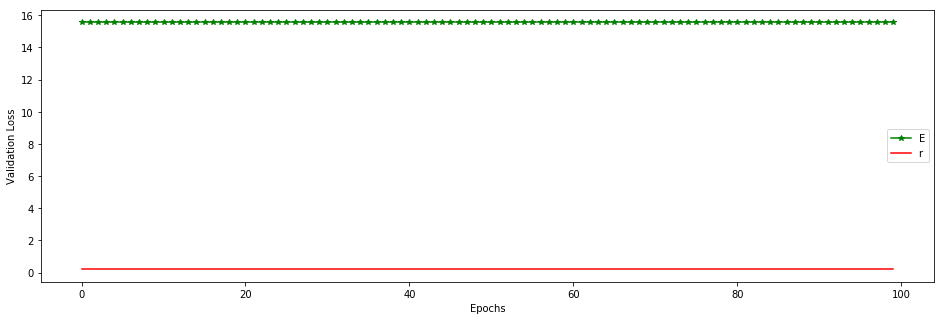

In [33]:
graficar_loss(historia)

<p>Al aplicar un modelo neuronal de 3 capas sobre los datos "brutos", se obtienen errores de validación absurdamente altos (val_loss: 15.4619), los cuales se mantenienen e una linea constante tal cual se aprecia en el gráfico. Una nueva configuración a probar será aplicando el modelo a los datos escalados según la cantidad máxima de los pixeles.</p>

In [34]:
x_tr_scaled,x_v_scaled,x_t_scaled=escalar(x_tr,x_v,x_t)

model = Sequential()
model.add(Dense(30, input_dim=x_tr_scaled.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(30, kernel_initializer='uniform', activation='relu'))
model.add(Dense(25, kernel_initializer='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
historia = model.fit(x_tr_scaled.values, to_categorical(y_tr), epochs=100, batch_size=128, verbose=1,validation_data=(x_v_scaled.values,to_categorical(y_v)))

Train on 20455 samples, validate on 7000 samples
Epoch 1/100
20455/20455 [==============================] - 1s 55us/step - loss: 3.2114 - acc: 0.0494 - val_loss: 3.2037 - val_acc: 0.0690
Epoch 2/100
20455/20455 [==============================] - 1s 38us/step - loss: 3.1958 - acc: 0.0469 - val_loss: 3.1842 - val_acc: 0.0463
Epoch 3/100
20455/20455 [==============================] - 1s 38us/step - loss: 3.1790 - acc: 0.0498 - val_loss: 3.1730 - val_acc: 0.0440
Epoch 4/100
20455/20455 [==============================] - 1s 38us/step - loss: 3.1666 - acc: 0.0553 - val_loss: 3.1525 - val_acc: 0.0747
Epoch 5/100
20455/20455 [==============================] - 1s 38us/step - loss: 3.0819 - acc: 0.0932 - val_loss: 2.9421 - val_acc: 0.0987
Epoch 6/100
20455/20455 [==============================] - 1s 38us/step - loss: 2.8850 - acc: 0.1030 - val_loss: 2.8161 - val_acc: 0.1099
Epoch 7/100
20455/20455 [==============================] - 1s 38us/step - loss: 2.7836 - acc: 0.1273 - val_loss: 2.7563 - v

20455/20455 [==============================] - 1s 38us/step - loss: 0.4014 - acc: 0.8928 - val_loss: 0.2541 - val_acc: 0.9223
Epoch 60/100
20455/20455 [==============================] - 1s 40us/step - loss: 0.2309 - acc: 0.9334 - val_loss: 0.2262 - val_acc: 0.9277
Epoch 61/100
20455/20455 [==============================] - 1s 39us/step - loss: 0.2198 - acc: 0.9395 - val_loss: 0.3199 - val_acc: 0.8884
Epoch 62/100
20455/20455 [==============================] - 1s 39us/step - loss: 0.5036 - acc: 0.8835 - val_loss: 2.6420 - val_acc: 0.4210
Epoch 63/100
20455/20455 [==============================] - 1s 38us/step - loss: 0.3953 - acc: 0.8857 - val_loss: 0.1790 - val_acc: 0.9510
Epoch 64/100
20455/20455 [==============================] - 1s 38us/step - loss: 0.1811 - acc: 0.9477 - val_loss: 0.1622 - val_acc: 0.9571
Epoch 65/100
20455/20455 [==============================] - 1s 38us/step - loss: 0.1601 - acc: 0.9569 - val_loss: 0.1697 - val_acc: 0.9464
Epoch 66/100
20455/20455 [==============

KeyboardInterrupt: 

In [ ]:
graficar_loss(historia)

<p>Se logra una considerable disminución del error de validación, llegando a estar por debajo del valor 0,2. Sin embargo, se buscará estabilizar este error para asegurar que no supere el umbral ya mencionado. Para esto, se añadirán capas en la red y se modificará la cantidad de neuronas presentes, aumentando las de entrada y disminuyendolas en las posteriores.</p>

In [ ]:
model = Sequential()
model.add(Dense(200, input_dim=x_tr.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(175, kernel_initializer='uniform', activation='relu'))
model.add(Dense(150, kernel_initializer='uniform', activation='relu'))
model.add(Dense(125, kernel_initializer='uniform', activation='relu'))
model.add(Dense(100, kernel_initializer='uniform', activation='relu'))
model.add(Dense(75, kernel_initializer='uniform', activation='relu'))
model.add(Dense(50, kernel_initializer='uniform', activation='relu'))
model.add(Dense(25, kernel_initializer='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
historia = model.fit(x_tr.values, to_categorical(y_tr), epochs=100, batch_size=128, verbose=1,validation_data=(x_v.values,to_categorical(y_v)))

In [ ]:
graficar_loss(historia)

In [ ]:
scores = model.evaluate(x_t, to_categorical(y_t))
print ("El error de pruebas es de", scores[1])

<p>Se logra apreciar que no se consigue una buena disminución del error de pruebas. Con esto se puede concluir que estimar los valores y parámetros necesarios para una red neuronal no es una tarea fácil dado que se tendría que disponer de bastante tiempo y pruebas de varios datos para realizar una buena estimación de los parámetros requeridos.</p>

### 4.e)

In [ ]:
from sklearn.svm import SVC as SVM

svm= SVM()
svm.set_params(kernel='rbf')
svm.fit(x_tr,y_tr)
y_pred = svm.predict(x_t)
score = 1-accuracy_score(y_t, y_pred)
print(score)

x_tr_scaled,x_v_scaled,x_t_scaled=escalar(x_tr,x_v,x_t)
svm= SVM()
svm.set_params(kernel='rbf')
svm.fit(x_tr_scaled,y_tr)
y_pred = svm.predict(x_t_scaled)
score = 1-accuracy_score(y_t, y_pred)
print(score)

### 4.f)

In [ ]:
"""
mayor=0
for i in range(26,31):
    clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=i)
    clf.fit(x_tr,y_tr)
    acc_test = clf.score(x_v,y_v)
    if acc_test>mayor:
        mayor=acc_test
        pos=i
#La mejor profundidad encontrada fue 28
"""

clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=28)
clf.fit(x_tr,y_tr)
acc_test = clf.score(x_t,y_t)
print ("El error de pruebas sin escalar es", 1 - acc_test)

x_tr_scaled,x_v_scaled,x_t_scaled=escalar(x_tr,x_v,x_t)

clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=28)
clf.fit(x_tr_scaled,y_tr)
acc_test = clf.score(x_t_scaled,y_t)
print ("El error de pruebas con escalar es",1 - acc_test)

Se observa que el desempeño en árboles de decisión es equivalente para datos con o sin pre-procesamiento. Además, presentan un menor desempeño que los modelos anteriores. Esta igualdad entre los tipos de datos podría darse porque a pesar de que los datos cambian, mantienen sus proporciones y sus distribuciones, por lo que no alteran las divisiones provocadas por lo árboles.